In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
# Parameters
learning_rate = 0.01
training_epochs = 20000
display_step = 1000

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

Epoch: 0001 cost= 14.973610878 W= 1.131257 b= 0.3745281
Epoch: 1001 cost= 0.078523375 W= 0.2716905 b= 0.64250356
Epoch: 2001 cost= 0.077115797 W= 0.2560754 b= 0.75483674
Epoch: 3001 cost= 0.076999493 W= 0.25149387 b= 0.7877959
Epoch: 4001 cost= 0.076990925 W= 0.25015277 b= 0.79744416
Epoch: 5001 cost= 0.076990619 W= 0.24976078 b= 0.8002633
Epoch: 6001 cost= 0.076990716 W= 0.24964547 b= 0.8010925
Epoch: 7001 cost= 0.076990739 W= 0.2496119 b= 0.80133444
Epoch: 8001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 9001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 10001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 11001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 12001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 13001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 14001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 15001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 16001 cost= 0.076990746 W= 0.24960834 b= 0.80136055
Epoch: 17001 co

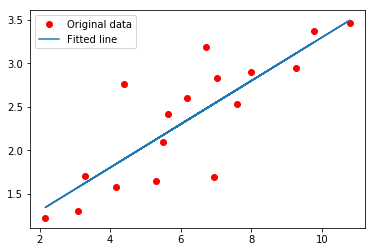

In [25]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate) #Gradient descent
train = optimizer.minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(train, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b) )

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()